In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


modules_route = str(os.getcwd()).replace("\\", "/")+"/Modules/"
sys.path.insert(0, modules_route)

import WavePlotter as wp


In [8]:
plotters = os.listdir(os.getcwd()+'/Data/plotdata')
plotters

['airborne.txt',
 'air_conditioner.txt',
 'alarm.txt',
 'bells.txt',
 'bird.txt',
 'braking.txt',
 'bus_idling.txt',
 'bus_moving.txt',
 'car_idling.txt',
 'crowd.txt',
 'cutting.txt',
 'drilling.txt',
 'explosives.txt',
 'fireworks.txt',
 'horn.txt',
 'impact.txt',
 'motorcycle_idling.txt',
 'motorcycle_moving.txt',
 'music.txt',
 'shouting.txt',
 'siren.txt',
 'steps.txt',
 'talk.txt',
 'water.txt']

In [29]:
datas = []
for t in plotters:
    with open(os.getcwd()+'/Data/plotdata/' + t, "rb") as f:
        datas.append(pickle.load(f))

df = pd.DataFrame(columns = ['station', 'X [frequency]', 'Y [psd]', 'label' ])

for i in range(len(datas)):
    df = df.append(datas[i])
    
df = df.reset_index()

for i in range(len(df)):
    
    if (df.at[i, 'station'] == 'vit_global'):
        
        df.at[i, 'Y [psd]'] = np.mean(df.at[i, 'Y [psd]'], axis = 1)
        
    df.at[i, 'Y [psd]'] = df.at[i, 'Y [psd]'].flatten()

df.pop('index')
    
df

,station,X [frequency],Y [psd],label
0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-30.510592, -26.386011, -26.29007, -26.47629,...",airborne
1,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-34.239758, -25.954147, -22.232414, -22.25546...",airborne
2,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-38.910637, -34.479397, -32.158936, -30.31726...",airborne
3,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-35.488373, -38.43441, -47.148575, -42.87484,...",airborne
4,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-25.64884, -19.783684, -17.31609, -16.476799,...",airborne
...,...,...,...,...
124,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-23.383844, -16.25587, -12.790388, -12.910527...",talk
125,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-14.588615, -9.436196, -12.369392, -15.555002...",talk
126,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-28.909582, -23.986877, -23.221636, -22.89333...",water
127,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.006374, -38.306538, -32.15228, -31.067917...",water


In [16]:
df.loc[df['label'] == 'horn']

,index,station,X [frequency],Y [psd],label
61,0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-29.42181, -23.592318, -21.550617, -20.460072...",horn
62,1,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-65.820145, -56.892017, -44.632317, -39.32468...",horn
63,2,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.175087, -36.075935, -39.28438, -37.072865...",horn
64,3,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-35.792595, -34.728405, -35.306637, -31.57204...",horn
65,4,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.516827, -32.86572, -30.312248, -28.003166...",horn
66,5,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-32.114723, -26.927883, -22.956472, -20.27525...",horn
67,6,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-19.219414, -9.843602, -11.472109, -14.320692...",horn


In [10]:
df['label'].unique()

array(['airborne', 'air_conditioner', 'braking', 'bells', 'bird',
       'bus_idling', 'bus_moving', 'car_idling', 'crowd', 'cutting',
       'drilling', 'explosives', 'fireworks', 'horn', 'impact',
       'motorcycle_idling', 'motorcycle_moving', 'music', 'shouting',
       'siren', 'steps', 'talk', 'water'], dtype=object)

In [18]:
df['station'].unique()

array(['capta_002', 'campus_miraflores', 'capta_004', 'capta_003', 'mma',
       'control_acustico', 'vit_global'], dtype=object)

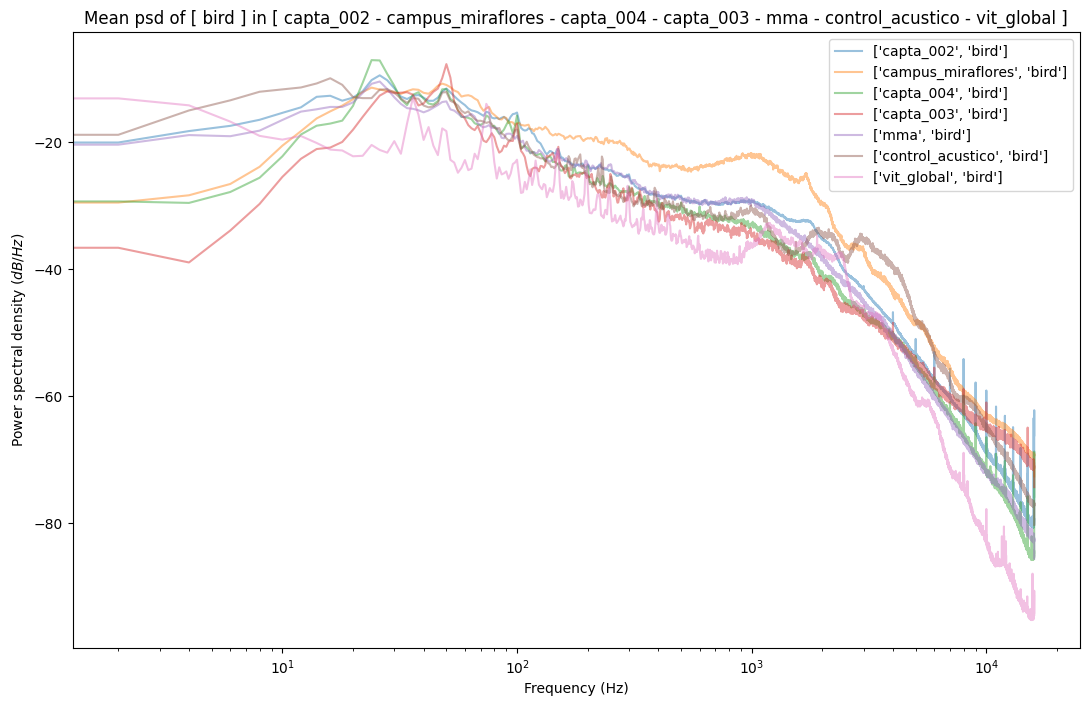

In [30]:
wp.PSD_plot(df = df, station = ['capta_002', 'campus_miraflores', 'capta_004', 'capta_003', 'mma',
       'control_acustico', 'vit_global'], label = ['bird'])

In [3]:
a_plot = wp.WavePlot()

Selection: Z:/Proyectos/fusa-training/Data/Threshold_05/bird.txt


In [5]:
colormap = {'capta_002' : 'sienna',
            'capta_003' : 'g', 
            'capta_004' : 'r', 
            'campus_miraflores' : 'c', 
            'mma' : 'y',
            'control_acustico' : 'navy', 
            'vit_global' : 'olive'}

Working at: Z:/Proyectos/fusa-training/Audios/bird
ERUIDO2022_20211220211628_bird_36632.wav
2801 / 2801


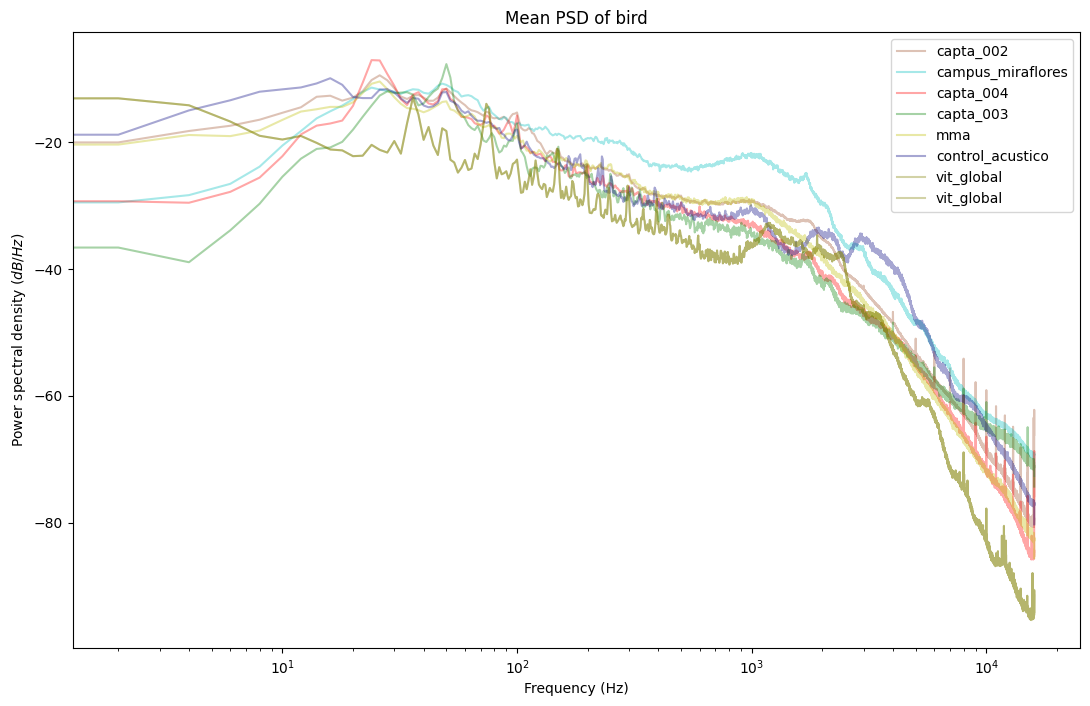

In [6]:
# # fig, ax = plt.subplots()
# # ax1 = bells.Mean_Power_Spectral_Density(color = colormap)

a_plot.Mean_Power_Spectral_Density(color = colormap)

In [7]:
with open(os.getcwd()+'/Data/plotdata/bird.txt', "wb") as f:
    pickle.dump(a_plot.plotdata, f)

In [35]:
plotters = os.listdir(os.getcwd()+'/Data/plotdata')
plotters

['airborne.txt',
 'air_conditioner.txt',
 'alarm.txt',
 'bells.txt',
 'bird.txt',
 'braking.txt',
 'bus_idling.txt',
 'bus_moving.txt',
 'car_idling.txt',
 'crowd.txt',
 'cutting.txt',
 'drilling.txt',
 'explosives.txt',
 'fireworks.txt',
 'horn.txt',
 'impact.txt',
 'motorcycle_idling.txt',
 'motorcycle_moving.txt',
 'music.txt',
 'shouting.txt',
 'siren.txt',
 'steps.txt',
 'talk.txt',
 'water.txt']

In [67]:
columns = ['Label', 'Label Counts','Total Label Time [s]', 'Mean Duration per Label [s]']
rows = []

In [68]:
for i in plotters:
    filename = os.getcwd()+'/Data/Threshold_05/'+i
    daf = pd.read_csv(filename, sep=' ')
    label = i.replace('.txt', '')
    counts = round(len(daf), 0)
    time = round(daf['duration'].sum(), 1)
    mean_time = round(daf['duration'].sum()/len(daf), 1)
    
    rows.append([label, counts,time, mean_time])
readme = pd.DataFrame(rows,columns=columns)
readme.index += 1
readme

,Label,Label Counts,Total Label Time [s],Mean Duration per Label [s]
1,airborne,141,1514.2,10.7
2,air_conditioner,3,35.2,11.7
3,alarm,567,4163.9,7.3
4,bells,9,14.6,1.6
5,bird,2801,12513.0,4.5
6,braking,222,463.0,2.1
7,bus_idling,446,6808.8,15.3
8,bus_moving,634,7105.1,11.2
9,car_idling,196,2468.6,12.6
10,crowd,194,1962.3,10.1


In [69]:
a = readme.to_html()
print(a)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Label</th>
      <th>Label Counts</th>
      <th>Total Label Time [s]</th>
      <th>Mean Duration per Label [s]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>airborne</td>
      <td>141</td>
      <td>1514.2</td>
      <td>10.7</td>
    </tr>
    <tr>
      <th>2</th>
      <td>air_conditioner</td>
      <td>3</td>
      <td>35.2</td>
      <td>11.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>alarm</td>
      <td>567</td>
      <td>4163.9</td>
      <td>7.3</td>
    </tr>
    <tr>
      <th>4</th>
      <td>bells</td>
      <td>9</td>
      <td>14.6</td>
      <td>1.6</td>
    </tr>
    <tr>
      <th>5</th>
      <td>bird</td>
      <td>2801</td>
      <td>12513.0</td>
      <td>4.5</td>
    </tr>
    <tr>
      <th>6</th>
      <td>braking</td>
      <td>222</td>
      <td>463.0</td>
      <td>2.1</td>
    </tr>
    <tr>
      <th>7</th>
     

In [45]:
label = 'airborne'
time = round(daf['duration'].sum()/len(daf), 1)
time

10.7